<a href="https://colab.research.google.com/github/Samuela31/Deep-Learning-Laboratory/blob/main/DL_Lab_4_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d "zalando-research/fashionmnist"

 87% 60.0M/68.8M [00:00<00:00, 191MB/s]
100% 68.8M/68.8M [00:00<00:00, 186MB/s]


In [ ]:
!unzip fashionmnist.zip -d Fashion_MNIST

Archive:  fashionmnist.zip
  inflating: Fashion_MNIST/fashion-mnist_test.csv  
  inflating: Fashion_MNIST/fashion-mnist_train.csv  
  inflating: Fashion_MNIST/t10k-images-idx3-ubyte  
  inflating: Fashion_MNIST/t10k-labels-idx1-ubyte  
  inflating: Fashion_MNIST/train-images-idx3-ubyte  
  inflating: Fashion_MNIST/train-labels-idx1-ubyte  


In [ ]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data_train = pd.read_csv('Fashion_MNIST/fashion-mnist_train.csv')
data_test = pd.read_csv('Fashion_MNIST/fashion-mnist_test.csv')

input_shape = (28, 28, 1)

data_train.head(10) #28x28= 784 image pixels

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [ ]:
X = np.array(data_train.iloc[:, 1:]) #column 0 has labels
y = to_categorical(np.array(data_train.iloc[:, 0]))

y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

#test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

#reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
#48000 images of size 28x28 pixels with 1 channel
print(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3])

48000 28 28 1


In [ ]:
print(X_test.shape[0])

10000


In [ ]:
#convert to type float32 for cnn processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

#normalization
X_train /= 255
X_test /= 255
X_val /= 255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                184330    
                                                                 
Total params: 203434 (794.66 KB)
Trainable params: 203434 (794.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
results = model.fit(X_train, y_train, validation_split = 0.2, epochs=4, batch_size=250)

Epoch 1/4
154/154 [==============================] - 112s 713ms/step - loss: 0.5786 - accuracy: 0.7945 - val_loss: 0.4022 - val_accuracy: 0.8611
Epoch 2/4
154/154 [==============================] - 112s 728ms/step - loss: 0.3644 - accuracy: 0.8713 - val_loss: 0.3602 - val_accuracy: 0.8724
Epoch 3/4
154/154 [==============================] - 108s 701ms/step - loss: 0.3154 - accuracy: 0.8884 - val_loss: 0.3227 - val_accuracy: 0.8883
Epoch 4/4
154/154 [==============================] - 106s 691ms/step - loss: 0.2861 - accuracy: 0.8959 - val_loss: 0.3027 - val_accuracy: 0.8943


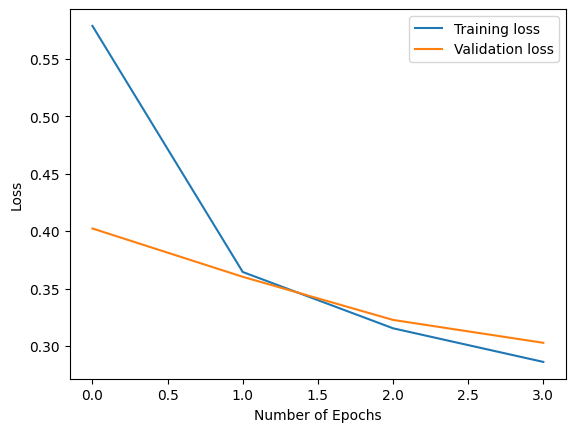

In [ ]:
import matplotlib.pyplot as plt

results.history.keys()
plt.plot(range(len(results.history['loss'])), results.history['loss'], label='Training loss')
plt.plot(range(len(results.history['loss'])), results.history['val_loss'], label='Validation loss')

plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.show()

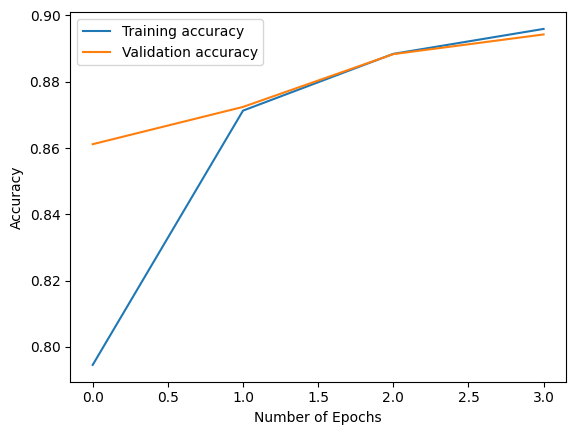

In [ ]:
plt.plot(range(len(results.history['accuracy'])), results.history['accuracy'], label='Training accuracy')
plt.plot(range(len(results.history['accuracy'])), results.history['val_accuracy'], label='Validation accuracy')

plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()

plt.show()

In [ ]:
plot = pd.DataFrame()
plot['Validation Accuracy'] = model.history.history['val_accuracy']
plot['Training Accuracy'] = model.history.history['accuracy']
plot['Validation Loss'] = model.history.history['val_loss']
plot['Training Loss'] = model.history.history['loss']
plot['Epoch'] = plot.reset_index()['index']+1
plot

,Validation Accuracy,Training Accuracy,Validation Loss,Training Loss,Epoch
0,0.861146,0.794531,0.402247,0.578565,1
1,0.872396,0.871276,0.360190,0.364375,2
2,0.888333,0.888411,0.322656,0.315371,3
3,0.894271,0.895938,0.302732,0.286100,4


In [ ]:
loss,acc = model.evaluate(X_train, y_train,verbose=0)
print('Train accuracy is ', acc*100, '%')

Train accuracy is  90.83124995231628 %


In [ ]:
loss,acc = model.evaluate(X_test, y_test,verbose=0)
print('Test accuracy is ', acc*100, '%')

Test accuracy is  89.46999907493591 %


In [ ]:
predicted_classes = model.predict(X_test)
predicted_classes

313/313 [==============================] - 7s 21ms/step


array([[9.25649166e-01, 1.45105233e-07, 1.66825601e-04, ...,
        4.09255279e-08, 1.83866752e-04, 3.85534209e-11],
       [2.04262665e-06, 9.99821186e-01, 5.59019275e-09, ...,
        7.64447776e-08, 4.92586514e-06, 1.43930832e-08],
       [1.20904315e-02, 6.56508234e-07, 3.94118190e-01, ...,
        3.95757134e-08, 3.48032081e-05, 5.36988637e-07],
       ...,
       [6.55343513e-07, 1.53884390e-08, 7.78649155e-06, ...,
        9.18380647e-06, 9.99879301e-01, 2.97919867e-09],
       [5.32708876e-03, 1.07224082e-06, 4.34941903e-04, ...,
        2.06787178e-07, 8.60152066e-01, 1.92313814e-06],
       [2.51391772e-02, 5.65288126e-01, 8.00026283e-02, ...,
        9.72575176e-09, 1.72714815e-02, 1.67225653e-06]], dtype=float32)

In [ ]:
print(y_test)
print("Single row: ",y_test[0]) #labels are from 0 to 9. If 0th col has 1, label is 0

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Single row:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#get the index of the column containing 1 in the first row
column_index = np.argmax(y_test[0])

print("Column index containing 1 in Row 0:", column_index)

Column index containing 1 in Row 0: 0


In [ ]:
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap='plasma')
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

1/1 [==============================] - 0s 20ms/step


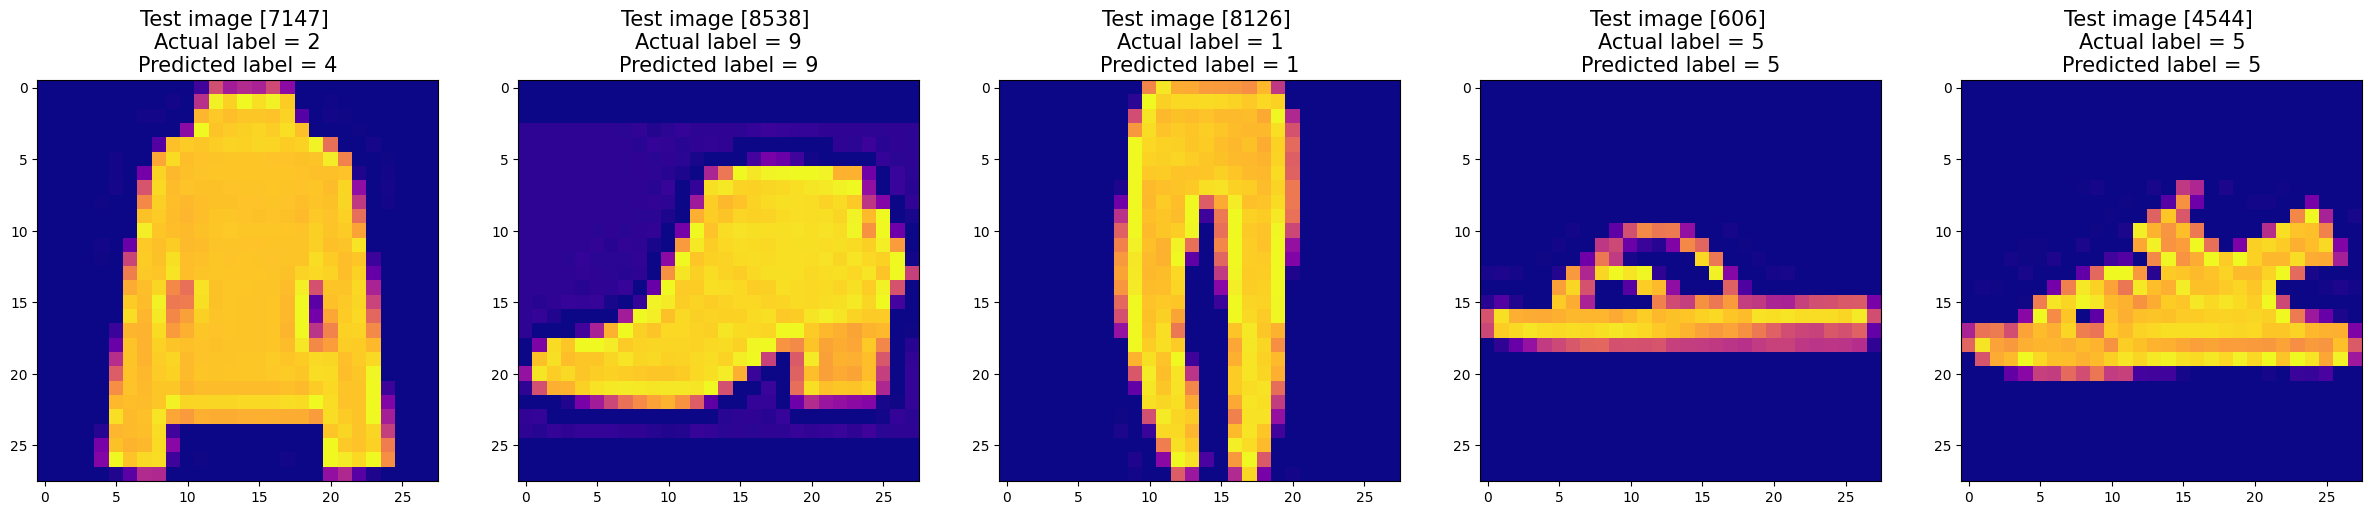

In [ ]:
import random

test_images = []
titles = []

for i in range(5):
    r = random.randint(1, 10000) #we have 10000 images in X_test
    sample_to_predict = X_test[r:r+1]  # Create a batch with a single sample, without batch it doesn't work
    predicted_label = model.predict(sample_to_predict)

    test_images.append(X_test[r].reshape(28,28))
    titles.append('Test image [' + str(r) + '] \nActual label = ' + str(np.argmax(y_test[r])) + '\nPredicted label = ' + str(np.argmax(predicted_label)))

show_images(test_images, titles)